In [1]:
import pandas as pd

In [2]:
# Load the data
file_path = "vehicle_cleaned.csv"  # Update with the correct file path
df = pd.read_csv(file_path)

# Check column names
print(df.columns)


Index(['date', 'zip_code', 'model_year', 'fuel', 'make', 'duty', 'vehicles',
       'lat', 'lon'],
      dtype='object')


In [3]:
# Extract only ZIP codes and model years
zip_model_data = df[['zip_code', 'lat', 'lon', 'vehicles','model_year']]
print(zip_model_data.head())  # Preview the first few rows


   zip_code       lat        lon  vehicles  model_year
0     90660  33.98809 -118.08921      21.0        2016
1     94303  47.78397   18.70168      48.0        2016
2     94547  38.00807 -122.26467      37.0        2016
3     93725  36.67955 -119.73938      12.0        2016
4     92505  48.10457   17.68756      20.0        2016


In [4]:
# Check for null values
print(zip_model_data.isnull().sum())

# Check unique values in Model_Year to ensure data consistency
print(zip_model_data['model_year'].unique())


zip_code      0
lat           0
lon           0
vehicles      0
model_year    0
dtype: int64
[2016 2017 2018 2019 2020 2022 2021 2023 2009 2010 2012 2013 2011 2014
 2015 2024]


In [5]:
import pandas as pd
from datetime import datetime

# Ensure 'model_year' is numeric
df["model_year"] = pd.to_numeric(df["model_year"], errors="coerce")

# Drop rows with invalid model years
df = df.dropna(subset=["model_year"])

# Convert to integer
df["model_year"] = df["model_year"].astype(int)

# Calculate vehicle age
current_year = datetime.now().year
df["vehicle_age"] = current_year - df["model_year"]

# Create a pivot table to count vehicles per ZIP code, model year, and vehicle age
yearly_distribution = df.pivot_table(
    index=["zip_code", "lat", "lon", "vehicle_age"], 
    columns="model_year", 
    values="vehicles", 
    aggfunc="sum", 
    fill_value=0
).reset_index()  # Reset index for better CSV structure

# Display the pivot table
print(yearly_distribution.head()) 

# Save the pivot table to a CSV file
yearly_distribution.to_csv("yearly_distribution.csv", index=False)

print("✅ Vehicle age column added and pivot table saved as 'yearly_distribution.csv'")

model_year  zip_code       lat       lon  vehicle_age  2009  2010  2011  2012  \
0              90000  35.21463  33.34315           16  61.0   0.0   0.0   0.0   
1              90001  48.33925  17.31092            1   0.0   0.0   0.0   0.0   
2              90001  48.33925  17.31092            2   0.0   0.0   0.0   0.0   
3              90001  48.33925  17.31092            3   0.0   0.0   0.0   0.0   
4              90001  48.33925  17.31092            4   0.0   0.0   0.0   0.0   

model_year  2013  2014  2015  2016  2017  2018  2019  2020   2021   2022  \
0            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0   
1            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0   
2            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0   
3            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  819.0   
4            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  905.0    0.0   

model_year   2023   2024  
0             0.0    0.0  
1 

In [6]:
# Check column names
print(df.columns)

Index(['date', 'zip_code', 'model_year', 'fuel', 'make', 'duty', 'vehicles',
       'lat', 'lon', 'vehicle_age'],
      dtype='object')


In [7]:
# Create a pivot table with marginal sums for vehicle age
yearly_distribution = df.pivot_table(
    index="vehicle_age",  # Group by vehicle age only (ignoring ZIP code)
    columns="model_year",
    values="vehicles",
    aggfunc="sum",
    fill_value=0,
    margins=True,  # Include marginal sums for vehicle age
)

# Print the pivot table
print(yearly_distribution)

model_year        2009      2010      2011      2012      2013      2014  \
vehicle_age                                                                
1                  0.0       0.0       0.0       0.0       0.0       0.0   
2                  0.0       0.0       0.0       0.0       0.0       0.0   
3                  0.0       0.0       0.0       0.0       0.0       0.0   
4                  0.0       0.0       0.0       0.0       0.0       0.0   
5                  0.0       0.0       0.0       0.0       0.0       0.0   
6                  0.0       0.0       0.0       0.0       0.0       0.0   
7                  0.0       0.0       0.0       0.0       0.0       0.0   
8                  0.0       0.0       0.0       0.0       0.0       0.0   
9                  0.0       0.0       0.0       0.0       0.0       0.0   
10                 0.0       0.0       0.0       0.0       0.0       0.0   
11                 0.0       0.0       0.0       0.0       0.0  858609.0   
12          

In [8]:
# Group data by vehicle age
age_groups = df.groupby('vehicle_age')

# Calculate total vehicle count per age group
total_by_age = age_groups['vehicles'].sum()

# Print the Series with vehicle age as index and total count as values
print(total_by_age)

vehicle_age
1      101623.0
2     1053815.0
3      950181.0
4      977203.0
5      870612.0
6     1126747.0
7     1171110.0
8     1171589.0
9     1113470.0
10    1053635.0
11     858609.0
12     788976.0
13     601298.0
14     429504.0
15     385551.0
16    3965123.0
Name: vehicles, dtype: float64


In [39]:
import plotly.graph_objects as go
import pandas as pd

# Load Data (Ensure correct data types)
df = pd.read_csv("vehicle_cleaned.csv")  # Replace with your actual file path
df['model_year'] = pd.to_numeric(df['model_year'], errors='coerce')
df['zip_code'] = df['zip_code'].astype(str)

# Filter for only ZIP codes with more than 100 vehicles
df_filtered = df[df['vehicles'] > 100]

# Define color mapping for fuel types
fuel_colors = {
    "Gasoline": "blue",
    "Diesel": "gray",
    "Diesel Hybrid": "black",
    "Other": "purple",
    "Natural Gas": "orange",
    "Battery Electric": "green",
    "Hybrid Gasoline": "yellow",
    "Plug-in Hybrid": "pink",
    "Flex-Fuel": "brown",
    "Hydrogen Fuel Cell": "cyan"
}

# Select ZIP codes for visualization
zip_options = df_filtered['zip_code'].unique().tolist()

# Create the plotly stacked bar chart
fig = go.Figure()

# Store visibility settings
visibility = []

# Add traces for each ZIP code (set all to hidden except first ZIP code)
for i, zip_code in enumerate(zip_options):
    zip_data = df_filtered[df_filtered['zip_code'] == zip_code]
    
    # Aggregate vehicle counts by model year & fuel type
    stacked_data = zip_data.groupby(['model_year', 'fuel'])['vehicles'].sum().unstack(fill_value=0)

    for fuel_type, color in fuel_colors.items():
        if fuel_type in stacked_data.columns:
            fig.add_trace(go.Bar(
                x=stacked_data.index,
                y=stacked_data[fuel_type],
                name=f"{fuel_type} ({zip_code})",
                marker_color=color,
                visible=(i == 0)  # Only show the first ZIP initially
            ))
            visibility.append(i == 0)

# Update layout
fig.update_layout(
    barmode='stack',
    title=f"Vehicle Age & Fuel Distribution in ZIP Code {zip_options[0]}",
    xaxis_title="Model Year",
    yaxis_title="Number of Vehicles",
    xaxis=dict(tickmode='array'),
    legend_title="Fuel Type",
    hovermode='x unified',
    template="plotly_dark",
)

# Add dropdown for ZIP code selection
fig.update_layout(
    updatemenus=[
        {
            'buttons': [
                {
                    'args': [
                        {'visible': [i == j for i in range(len(zip_options))]},
                        {'title': f"Vehicle Age & Fuel Distribution in ZIP Code {zip_code}"}
                    ],
                    'label': zip_code,
                    'method': 'update'
                }
                for j, zip_code in enumerate(zip_options)
            ],
            'direction': 'down',
            'showactive': True,
            'x': 0.1,
            'xanchor': 'left',
            'y': 1.15,
            'yanchor': 'top'
        }
    ]
)

# Save the plot to an HTML file
fig.write_html("vehicle_fuel_distribution_with_dropdown.html")

# Optionally, open the HTML file in the browser
import webbrowser
webbrowser.open("vehicle_fuel_distribution_with_dropdown.html")


# Create a pivot table to count vehicles per ZIP code and model year
yearly_distribution = df_filtered.pivot_table(index="zip_code", columns="model_year", values="vehicles", aggfunc="sum", fill_value=0)

# Display the pivot table
print(yearly_distribution)

# Save the chart as a static PNG image
fig.write_image("vehicle_fuel_distribution_with_dropdown.png")

model_year     2009   2010   2011   2012   2013   2014    2015    2016  \
zip_code                                                                 
90001        8394.0  292.0  341.0  511.0  560.0  600.0   846.0   956.0   
90002        6927.0  266.0  170.0  438.0  466.0  508.0   789.0   875.0   
90003       10851.0  427.0  554.0  686.0  707.0  796.0  1165.0  1160.0   
90004        4546.0  283.0  295.0  383.0  373.0  348.0   813.0   469.0   
90005        1619.0    0.0  117.0  102.0  116.0  117.0   289.0   270.0   
...             ...    ...    ...    ...    ...    ...     ...     ...   
96097         497.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0   
96101         127.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0   
96130        1473.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0   
96150        2629.0    0.0  247.0  117.0  290.0  173.0   267.0   286.0   
96161        1087.0    0.0  107.0    0.0  226.0  177.0   303.0   296.0   

model_year    2017    2018    2019   

In [10]:
# Load dataset
df = pd.read_csv("yearly_distribution.csv")

# Ensure column names are stripped of whitespace
df.columns = df.columns.str.strip()

# Reshape the DataFrame: Convert year columns into a single 'model_year' column
df_melted = df.melt(id_vars=['zip_code', 'lat', 'lon', 'vehicle_age'], 
                     var_name='model_year', 
                     value_name='vehicles')

# Convert 'model_year' to integer
df_melted['model_year'] = df_melted['model_year'].astype(int)

# Drop rows where 'vehicles' is NaN or 0 (optional)
df_melted = df_melted.dropna(subset=['vehicles'])
df_melted = df_melted[df_melted['vehicles'] > 0]  

# Verify the new structure
print(df_melted.head())

# Save to CSV for debugging if needed
df_melted.to_csv("reshaped_vehicle_data.csv", index=False)

    zip_code       lat        lon  vehicle_age  model_year  vehicles
0      90000  35.21463   33.34315           16        2009      61.0
16     90001  48.33925   17.31092           16        2009    8905.0
32     90002  48.34650   17.33428           16        2009    7321.0
48     90003   1.27867  103.81753           16        2009   11251.0
64     90004   1.27876  103.81844           16        2009    4750.0


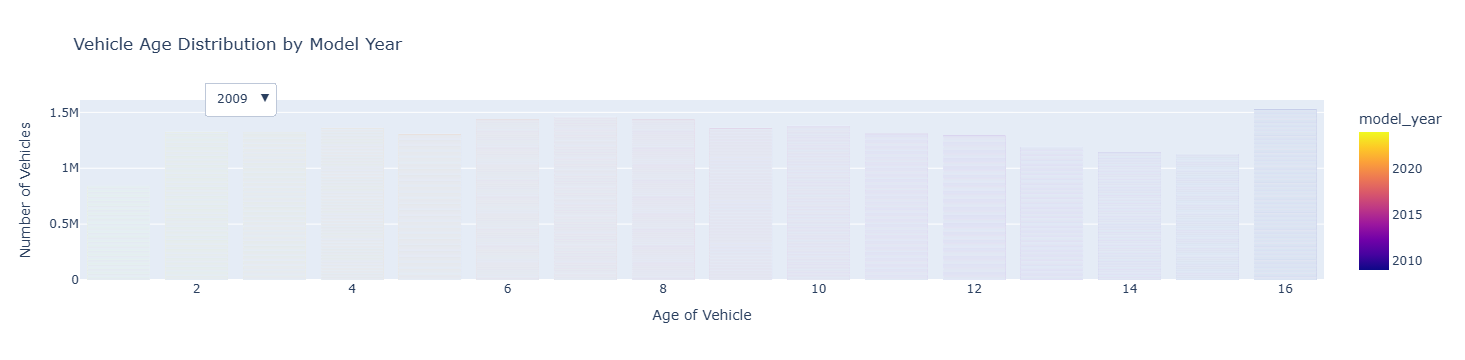

In [41]:
import pandas as pd
import plotly.express as px

# Sample data (replace with your own data)
df = pd.read_csv("reshaped_vehicle_data.csv")


# Calculate the count per vehicle age
df['Count'] = df.groupby('vehicle_age')['vehicle_age'].transform('size')

# Create a bar chart using Plotly Express
fig = px.bar(df, 
             x='vehicle_age', 
             y='Count',  # Corrected to 'Count'
             color='model_year',
             title="Vehicle Age Distribution by Model Year",
             labels={'vehicle_age': 'Age of Vehicle', 'Count': 'Number of Vehicles'})

# Create a dropdown menu to select model year
dropdown_buttons = [
    {
        'args': [{'visible': [True if year == selected_year else False for year in df['model_year'].unique()]}, 
                 {'title': f'Vehicle Age Distribution for Model Year {selected_year}'}],
        'label': f'{selected_year}',
        'method': 'relayout'
    }
    for selected_year in df['model_year'].unique()
]

# Add 'All' option to show all model years together
dropdown_buttons.append(
    {
        'args': [{'visible': [True] * len(df['model_year'].unique())}, 
                 {'title': 'Vehicle Age Distribution by Model Year'}],
        'label': 'All',
        'method': 'relayout'
    }
)

# Update layout for the dropdown
fig.update_layout(
    updatemenus=[
        {
            'buttons': dropdown_buttons,
            'direction': 'down',
            'showactive': True,
            'x': 0.1,
            'xanchor': 'left',
            'y': 1.1,
            'yanchor': 'top'
        }
    ]
)

# Set the visibility of traces based on the selection (show all by default)
fig.update_traces(visible=True)

fig.show()

# Save the chart as a static PNG image
fig.write_image("vehicle_age_distribution.png")

# Save the chart as an interactive HTML file
fig.write_html("vehicle_age_distribution.html")


In [38]:
import folium
from folium.plugins import MarkerCluster
import matplotlib.pyplot as plt
import pandas as pd

# Load your dataset (Ensure your CSV has: lat, lon, model_year, vehicle_age)
df = pd.read_csv("reshaped_vehicle_data.csv")

# Ensure column names are stripped of whitespace
df.columns = df.columns.str.strip()

# Filter for only Zip codes with more than 100 vehicles
df_filtered = df[df['vehicles'] > 100].copy()  # Make a copy to avoid SettingWithCopyWarning

# Ensure the 'model_year' column is treated as string
df_filtered['model_year'] = df_filtered['model_year'].astype(str)

# Normalize the 'model_year' column by stripping any extra spaces and standardizing the case
df_filtered['model_year'] = df_filtered['model_year'].str.strip().str.title()

# Check for unique values in 'model_year' to ensure the operation worked correctly
print(df_filtered['model_year'].unique())


# Define age range and corresponding colors (e.g., 1-3 years, 4-6 years, etc.)
age_ranges = {
    "1-3 years": (1, 3),
    "4-6 years": (4, 6),
    "7-9 years": (7, 9),
    "10-12 years": (10, 12),
    "13-15 years": (13, 15),
    "16 years": (16, 16)
}

# Define fuel type to color mapping
age_colors = {
    "1-3 years": 'pink',
    "4-6 years": 'blue',
    "7-9 years": 'darkgreen',
    "10-12 years": 'yellow',
    "13-15 years": 'purple',
    "16 years": 'orange',
}

# Function to categorize vehicle age into the defined age ranges
def categorize_age(age):
    for group, (min_age, max_age) in age_ranges.items():
        if min_age <= age <= max_age:
            return group
    return "Unknown"

# Apply the categorization function to the 'vehicle_age' column
df_filtered['age_group'] = df_filtered['vehicle_age'].apply(categorize_age)

# Create a folium map
m = folium.Map(location=[df_filtered['lat'].mean(), df_filtered['lon'].mean()], zoom_start=12)

# Create a MarkerCluster
marker_cluster = MarkerCluster().add_to(m)

# Add markers to the MarkerCluster
for _, row in df_filtered.iterrows():
    lat = row['lat']
    lon = row['lon']
    vehicles = row['vehicles']
    zip_code = row['zip_code']
    model_year = row['model_year']
    age_group = row['age_group']
    
    # Create the popup content with ZIP Code, Model Year, and Age Group
    popup_content = f"ZIP Code: {zip_code}<br>Model Year: {model_year}<br>Age Group: {age_group}"
    
    # Set the color based on the age group
    color = age_colors.get(age_group, 'gray')  # Default to gray if age group is not found
    
    # Add a marker to the MarkerCluster with the appropriate color
    folium.CircleMarker(
        location=[lat, lon],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6,
        popup=popup_content
    ).add_to(marker_cluster)

# Add a legend for the age groups
legend_html = '''
    <div style="position: fixed; 
                bottom: 10px; left: 10px; width: 200px; height: 150px; 
                background-color: white; opacity: 0.7; z-index:9999; font-size: 12px; padding: 10px;">
        <b>Vehicle Age Groups</b><br>
        <i style="background-color: {}">&nbsp;&nbsp;&nbsp;&nbsp;</i> 1-3 years<br>
        <i style="background-color: {}">&nbsp;&nbsp;&nbsp;&nbsp;</i> 4-6 years<br>
        <i style="background-color: {}">&nbsp;&nbsp;&nbsp;&nbsp;</i> 7-9 years<br>
        <i style="background-color: {}">&nbsp;&nbsp;&nbsp;&nbsp;</i> 10-12 years<br>
        <i style="background-color: {}">&nbsp;&nbsp;&nbsp;&nbsp;</i> 13-15 years<br>
        <i style="background-color: {}">&nbsp;&nbsp;&nbsp;&nbsp;</i> 16 years
    </div>
'''.format(age_colors["1-3 years"], age_colors["4-6 years"], age_colors["7-9 years"], 
           age_colors["10-12 years"], age_colors["13-15 years"], age_colors["16 years"])

m.get_root().html.add_child(folium.Element(legend_html))

# Show the map
m

# Save the map to an HTML file
m.save("optimized_vehicle_age_group_map.html")

# Optionally, you can load the map in the browser automatically (works if you are running this in Jupyter)
import webbrowser
webbrowser.open("optimized_vehicle_age_group_map.html")

# Save the chart as a static PNG image
fig.write_image("optimized_vehicle_age_group_map.png")

['2009' '2010' '2011' '2012' '2013' '2014' '2015' '2016' '2017' '2018'
 '2019' '2020' '2021' '2022' '2023' '2024']


In [37]:
import folium
import pandas as pd
from folium.plugins import HeatMapWithTime

# Load your dataset (Ensure your CSV has: lat, lon, model_year, vehicle_age)
df = pd.read_csv("reshaped_vehicle_data.csv")

# Convert model_year to string and sort by year
df["model_year"] = df["model_year"].astype(str)
years = sorted(df["model_year"].unique())

# Define age weight function (higher weight for newer vehicles)
def age_weight(age):
    if age <= 3:
        return 1.5  # Newer vehicles get more intensity
    elif age <= 6:
        return 1.2
    elif age <= 9:
        return 1.0
    elif age <= 12:
        return 0.8
    elif age <= 15:
        return 0.6
    else:
        return 0.4  # Oldest vehicles have lower intensity

# Apply weight function
df["weight"] = df["vehicle_age"].apply(age_weight)

# Create time-series heatmap data (grouped by model year)
time_series_data = []
for year in years:
    year_data = df[df["model_year"] == year][["lat", "lon", "weight"]].values.tolist()
    time_series_data.append(year_data)

# Create a folium map
m = folium.Map(location=[df["lat"].mean(), df["lon"].mean()], zoom_start=10)

# Add time-series heatmap
HeatMapWithTime(time_series_data, index=years, radius=15, auto_play=True, max_opacity=0.8).add_to(m)

# Add a legend for vehicle age groups
legend_html = '''
    <div style="position: fixed; 
                bottom: 10px; left: 10px; width: 220px; height: 180px; 
                background-color: white; opacity: 0.85; z-index:9999; font-size: 12px; padding: 10px;
                border-radius: 5px;">
        <b>Vehicle Age Intensity</b><br>
        <i style="background: red; width: 15px; height: 15px; display: inline-block;"></i> 1-3 years (Highest Intensity)<br>
        <i style="background: orange; width: 15px; height: 15px; display: inline-block;"></i> 4-6 years<br>
        <i style="background: yellow; width: 15px; height: 15px; display: inline-block;"></i> 7-9 years<br>
        <i style="background: green; width: 15px; height: 15px; display: inline-block;"></i> 10-12 years<br>
        <i style="background: blue; width: 15px; height: 15px; display: inline-block;"></i> 13-15 years<br>
        <i style="background: purple; width: 15px; height: 15px; display: inline-block;"></i> 16+ years (Lowest Intensity)
    </div>
'''
m.get_root().html.add_child(folium.Element(legend_html))

# Save and open the map
m.save("time_series_weighted_heatmap.html")
import webbrowser
webbrowser.open("time_series_weighted_heatmap.html")

# Save the chart as a static PNG image
fig.write_image("time_series_weighted_heatmap.png")
